In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [48]:
file_path = r'C:\Users\Jayesh vala\OneDrive - Saint Peters University\DS-670-capstone\Downtown_Parking_Lots.csv'

In [49]:
data = pd.read_csv( r'C:\Users\Jayesh vala\OneDrive - Saint Peters University\DS-670-capstone\Downtown_Parking_Lots.csv')


In [50]:
print("Original Data:")
print(data.head())

Original Data:
   OBJECTID  FACILITYID  INTID  SALESFORCEID  SUBTYPEID  \
0         2           2      2           0.0        0.0   
1         4           4      4           0.0        0.0   
2         5           5      5           0.0        0.0   
3         6           6      6           0.0        0.0   
4         7           7      7           0.0        NaN   

                                     NAME                         ADDRESS  \
0          SJ State University 7th Street                                   
1  SJ State University 10th Street Garage                                   
2               Cahill Lot 4 (Caltrain 4)   4 Cahill Street, San Jose, CA   
3               Cahill Lot 2 (Caltrain 2)  21 Cahill Street, San Jose, CA   
4               Cahill Lot 3 (Caltrain 3)                71 Cahill Street   

          OWNERSHIP  TOTALSPACECOUNT  EVSPACECOUNT  ...  PARKINGTYPE  \
0      SJSU Parking           1980.0           NaN  ...          NaN   
1      SJSU Parking    

In [51]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
OBJECTID               0
FACILITYID             0
INTID                  0
SALESFORCEID          50
SUBTYPEID             47
NAME                   0
ADDRESS                0
OWNERSHIP              0
TOTALSPACECOUNT        3
EVSPACECOUNT          81
ADASPACECOUNT         81
RESERVEDSPACECOUNT    82
VALIDATION            59
PARKINGTYPE           59
NUMBEROFLEVELS        81
PERMITS                3
BIPLEASE               3
BIPAREA                3
CREATIONDATE          48
LASTUPDATE             0
NOTES                  0
SHAPE_Length           0
SHAPE_Area             0
dtype: int64


In [52]:
columns_to_drop = ['SALESFORCEID', 'PERMITS', 'BIPLEASE','CREATIONDATE','NOTES','SHAPE_Length','SHAPE_Area','VALIDATION','BIPAREA','OBJECTID','INTID','SUBTYPEID']  # Replace with the actual column names you want to drop
data = data.drop(columns=columns_to_drop)


In [53]:
imputer = SimpleImputer(strategy='most_frequent')  # You can choose other strategies like 'median', 'most_frequent', etc.
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [54]:
print("\nPreprocessed Data:")
print(data_imputed.head())

# Save the preprocessed data to a new CSV file
data_imputed.to_csv('preprocessed_data.csv', index=False)


Preprocessed Data:
  FACILITYID                                    NAME  \
0          2          SJ State University 7th Street   
1          4  SJ State University 10th Street Garage   
2          5               Cahill Lot 4 (Caltrain 4)   
3          6               Cahill Lot 2 (Caltrain 2)   
4          7               Cahill Lot 3 (Caltrain 3)   

                          ADDRESS         OWNERSHIP TOTALSPACECOUNT  \
0                                      SJSU Parking          1980.0   
1                                      SJSU Parking          1490.0   
2   4 Cahill Street, San Jose, CA  City of San Jose           149.0   
3  21 Cahill Street, San Jose, CA  City of San Jose           162.0   
4                71 Cahill Street  City of San Jose            90.0   

  EVSPACECOUNT ADASPACECOUNT RESERVEDSPACECOUNT PARKINGTYPE NUMBEROFLEVELS  \
0          6.0          14.0               16.0         Lot            1.0   
1          6.0          14.0               16.0         Lot 

Exploratory Data analysis.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
file_path = 'preprocessed_data.csv'
data = pd.read_csv(file_path)

In [57]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FACILITYID          89 non-null     int64  
 1   NAME                89 non-null     object 
 2   ADDRESS             89 non-null     object 
 3   OWNERSHIP           89 non-null     object 
 4   TOTALSPACECOUNT     89 non-null     float64
 5   EVSPACECOUNT        89 non-null     float64
 6   ADASPACECOUNT       89 non-null     float64
 7   RESERVEDSPACECOUNT  89 non-null     float64
 8   PARKINGTYPE         89 non-null     object 
 9   NUMBEROFLEVELS      89 non-null     float64
 10  LASTUPDATE          89 non-null     object 
dtypes: float64(5), int64(1), object(5)
memory usage: 7.8+ KB
None


In [58]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       FACILITYID  TOTALSPACECOUNT  EVSPACECOUNT  ADASPACECOUNT  \
count   89.000000        89.000000     89.000000      89.000000   
mean    48.089888       397.955056      6.033708      13.876404   
std     26.323875       467.298010      0.789842       1.594167   
min      2.000000        13.000000      0.000000       3.000000   
25%     26.000000        71.000000      6.000000      14.000000   
50%     48.000000       162.000000      6.000000      14.000000   
75%     70.000000       568.000000      6.000000      14.000000   
max     93.000000      1980.000000      9.000000      21.000000   

       RESERVEDSPACECOUNT  NUMBEROFLEVELS  
count           89.000000       89.000000  
mean            15.786517        1.314607  
std              2.129191        1.275606  
min              2.000000        1.000000  
25%             16.000000        1.000000  
50%             16.000000        1.000000  
75%             16.000000        1.000000  
max             26.0000

In [59]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
FACILITYID            0
NAME                  0
ADDRESS               0
OWNERSHIP             0
TOTALSPACECOUNT       0
EVSPACECOUNT          0
ADASPACECOUNT         0
RESERVEDSPACECOUNT    0
PARKINGTYPE           0
NUMBEROFLEVELS        0
LASTUPDATE            0
dtype: int64


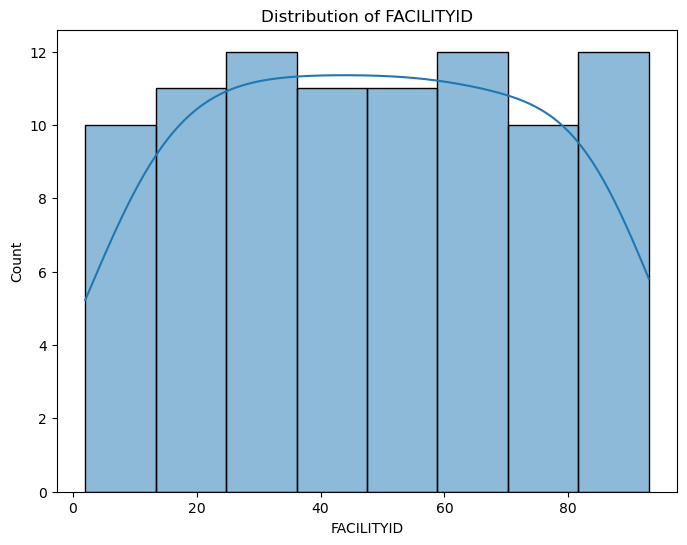

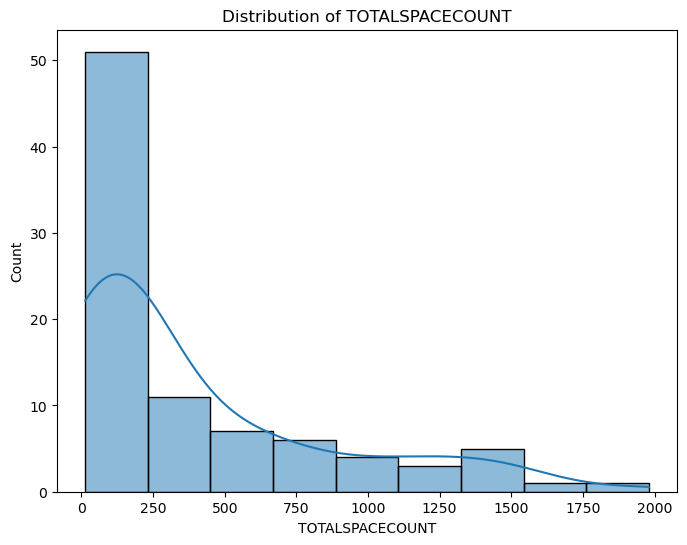

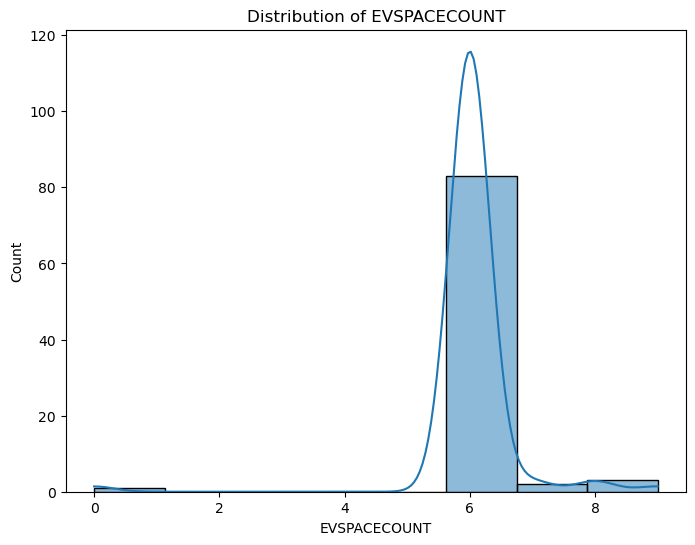

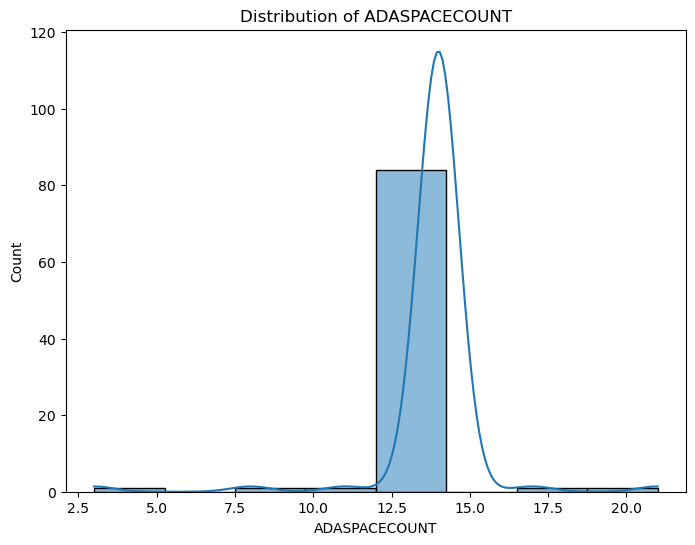

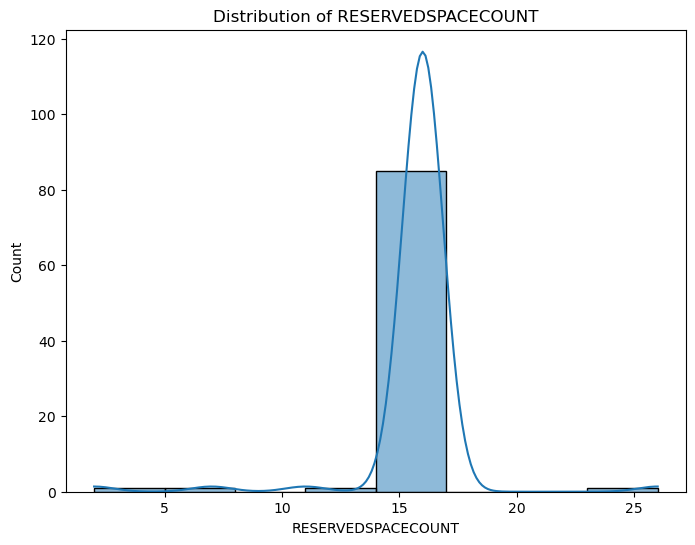

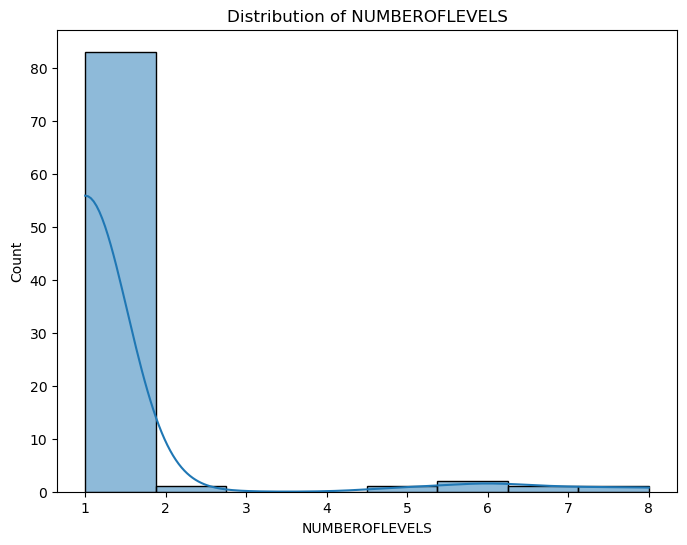

In [60]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

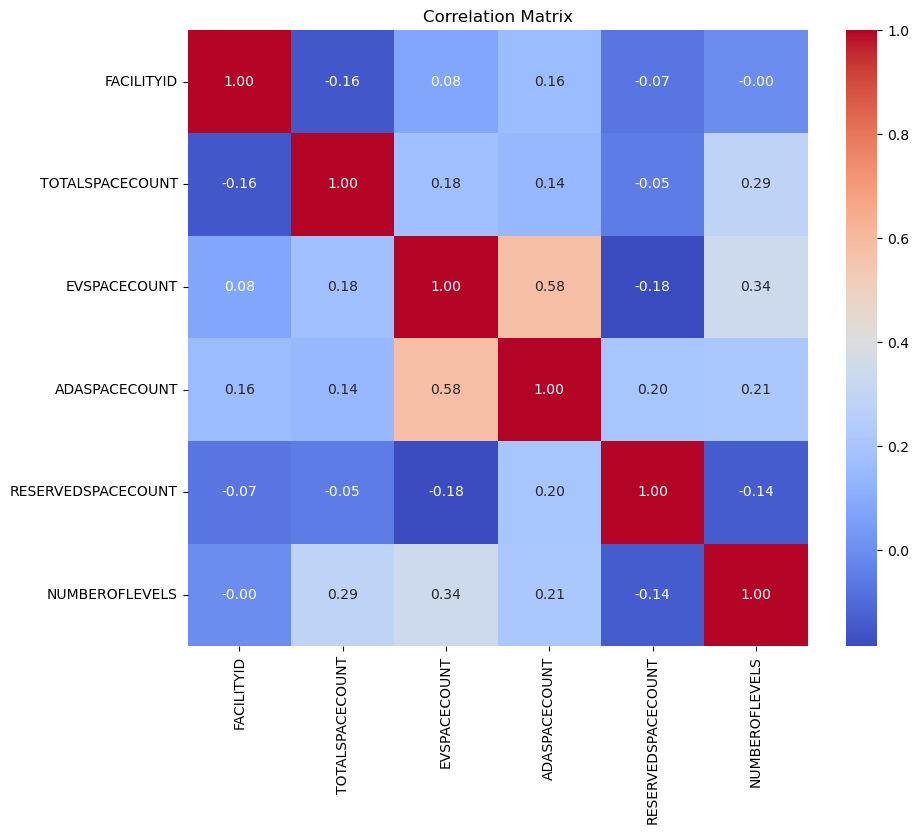

In [61]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

C:\Users\Jayesh vala\anaconda3\envs\ML\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


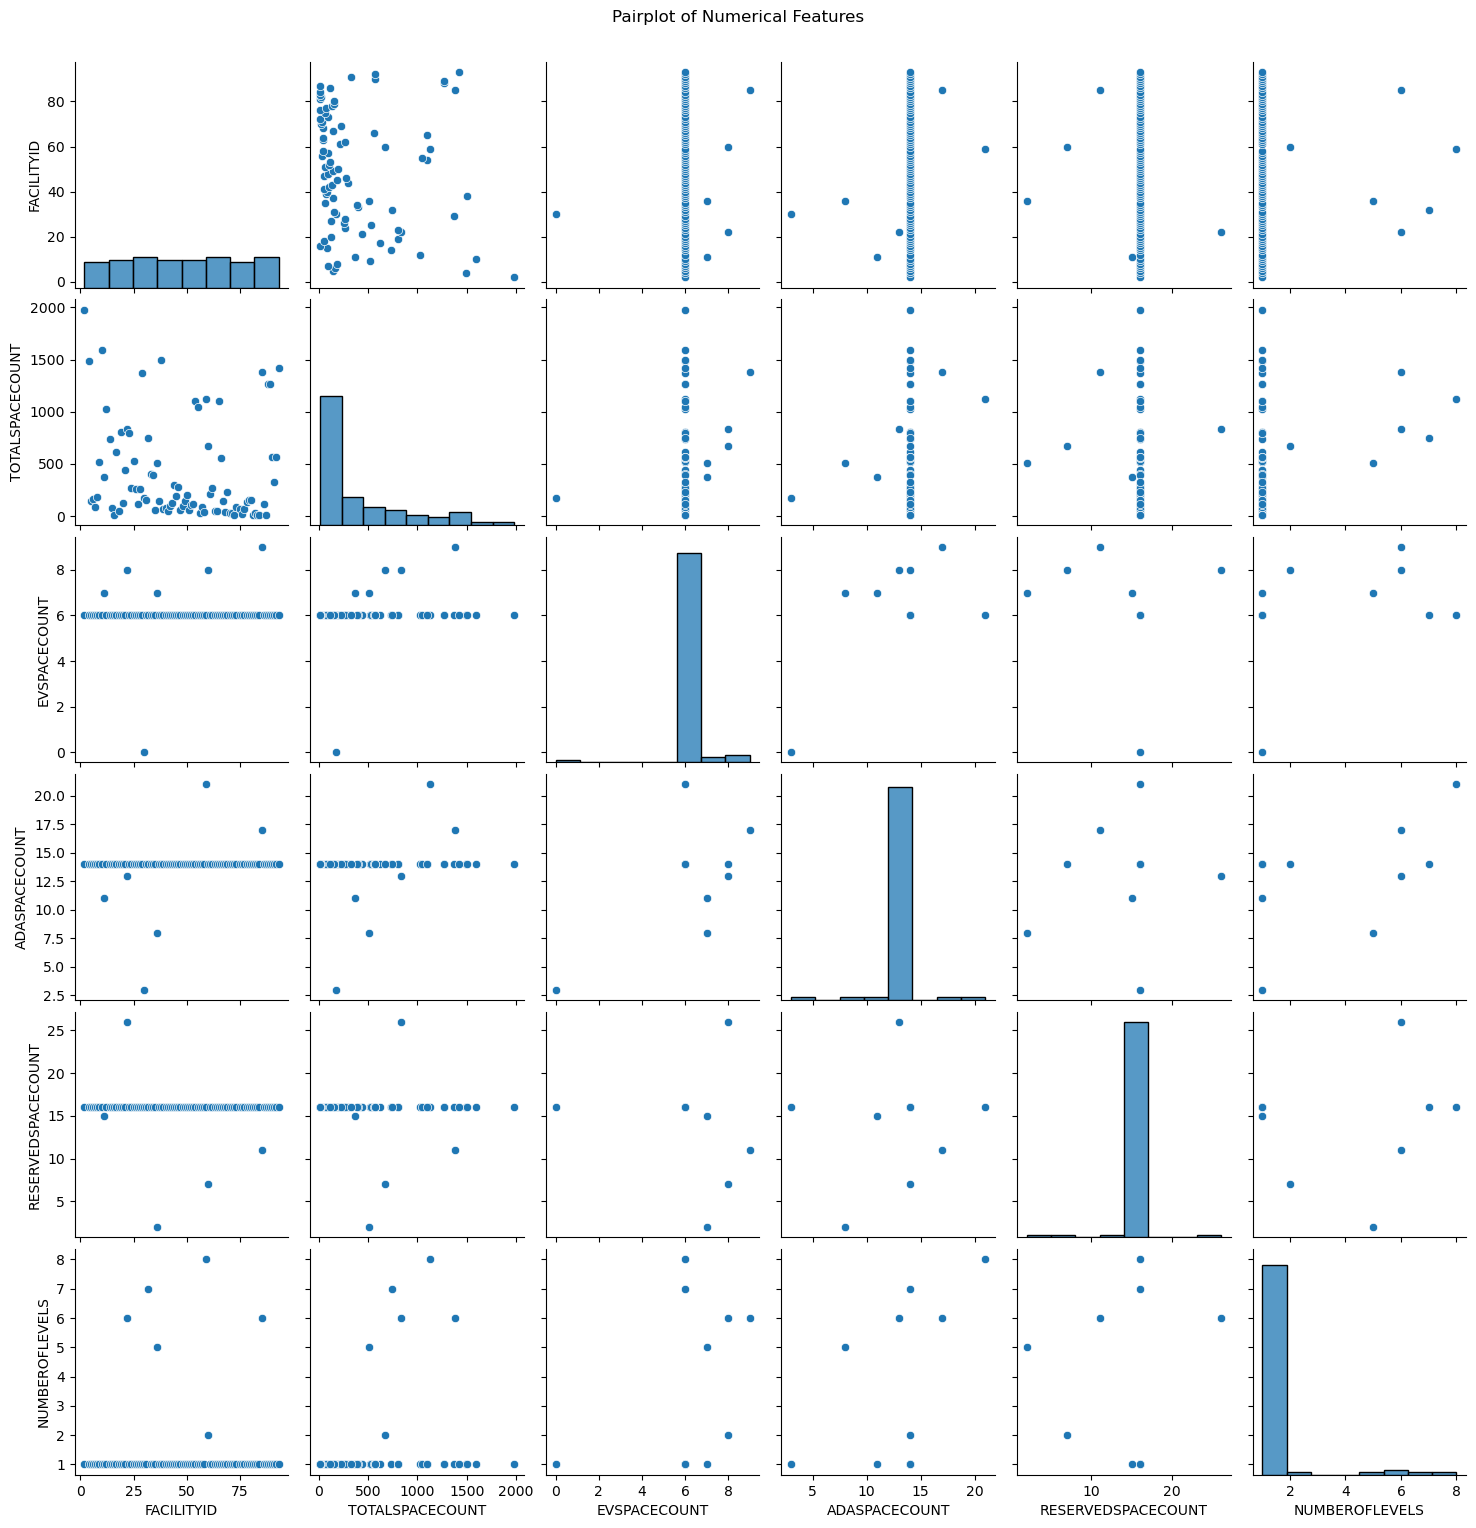

In [62]:
sns.pairplot(data[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25456\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


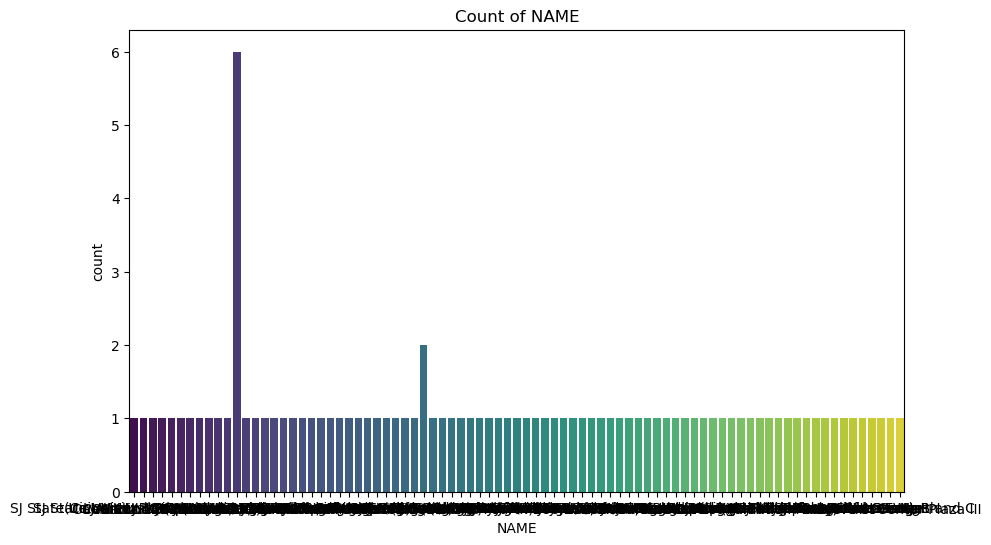

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25456\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


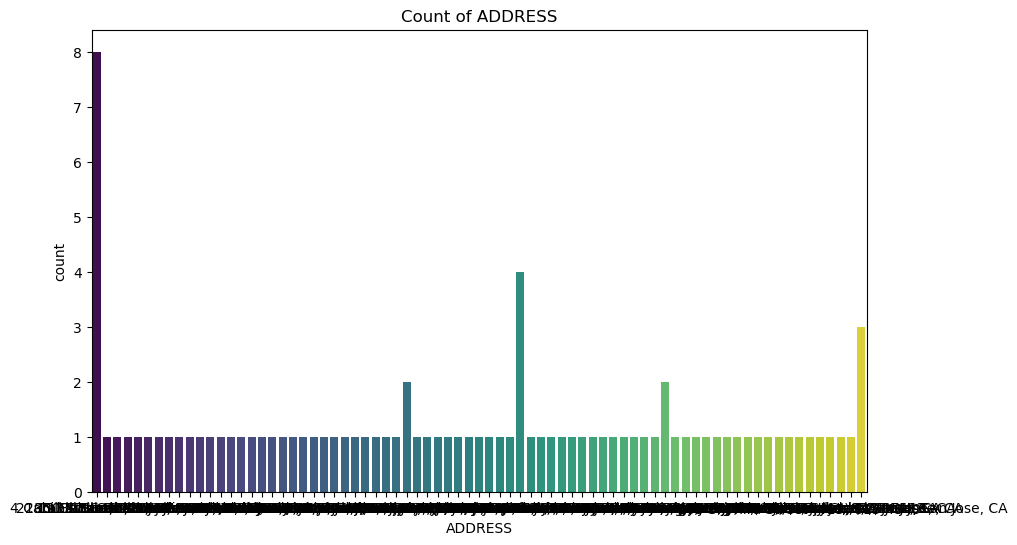

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25456\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


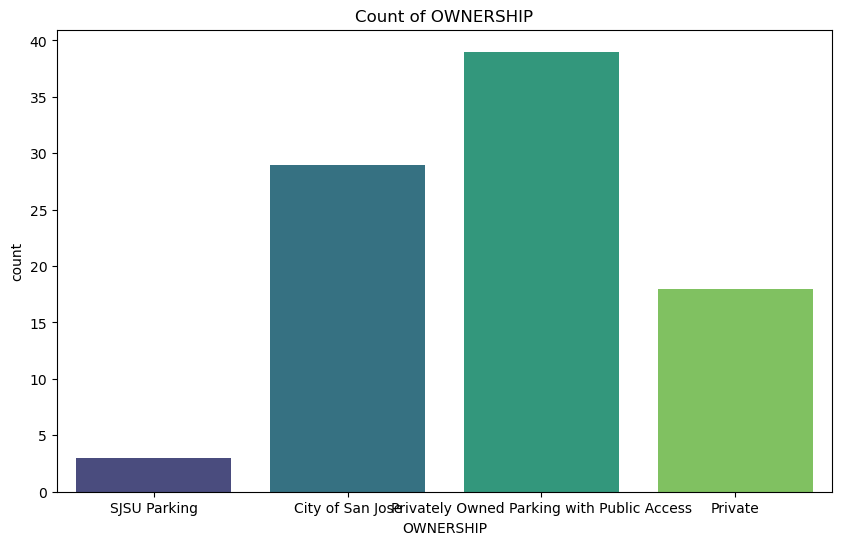

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25456\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


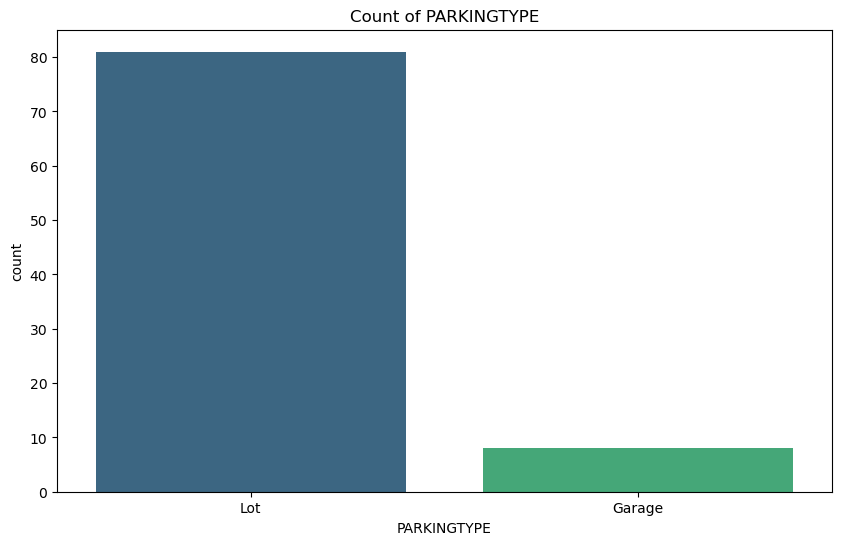

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25456\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


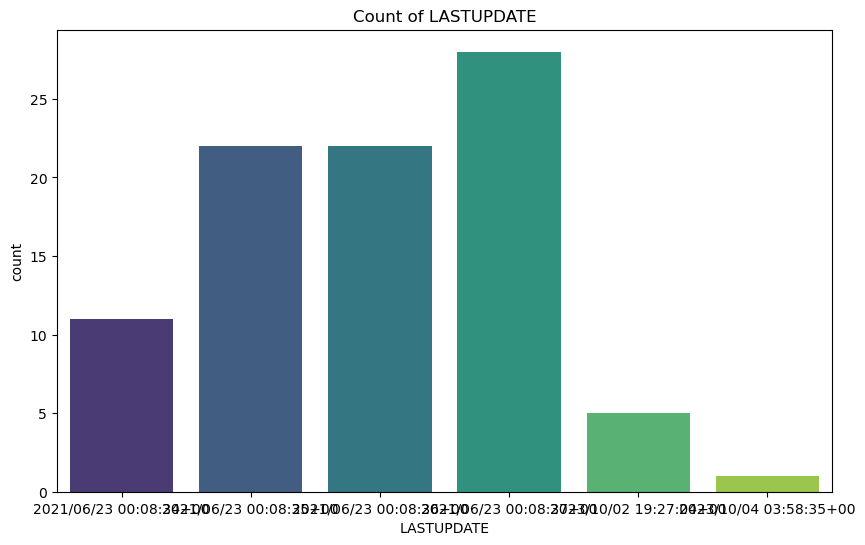

In [63]:
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data, palette="viridis")
    plt.title(f'Count of {feature}')
    plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


parking_data = pd.read_csv("preprocessed_data.csv")
target_column = 'TOTALSPACECOUNT'
X = parking_data.drop(columns=[target_column, 'NAME', 'ADDRESS'])
y = parking_data[target_column]

Final_Dataframe=pd.DataFrame({
        'Model': [],
        'Mean Squared Error':[]
    } )
results_list=[]
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Impute missing values for numeric columns
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), numeric_features),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values for categorical columns
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ]
)

# Impute missing values in the target variable
y = y.fillna(y.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Append the regression model to the pipeline
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Mean Squared Error'])

# Iterate over models
for model_name, model in models:
    # Append the regression model to the pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    
    # Evaluate the model using R-squared
    r_squared = model_pipeline.score(X_test, y_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    # Store results in the DataFrame
    # results_df=
    
    results_list.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'R-squared': r_squared,
        'RMSE': rmse

    })

# Concatenate the list of DataFrames into the Final_Dataframe
Final_Dataframe = pd.concat([Final_Dataframe, pd.DataFrame(results_list)], ignore_index=True)

# Display the results table
Final_Dataframe

,Model,Mean Squared Error,R-squared,RMSE
0,Linear Regression,183385.541765,0.375011,428.235381
1,Decision Tree Regressor,210688.500000,0.281961,459.008170
2,Random Forest Regressor,154943.122056,0.471945,393.628152
3,Gradient Boosting Regressor,110159.301888,0.624571,331.902549


In [6]:
# Create the Linear Regression model
linear_reg_model = LinearRegression()

# Create the pipeline with the preprocessor and the Linear Regression model
linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_reg_model)
])

# Train the model
linear_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FACILITYID', 'EVSPACECOUNT', 'ADASPACECOUNT', 'RESERVEDSPACECOUNT',
       'NUMBEROFLEVELS'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OWNERSHIP', 'PARKINGTYPE', 'LASTUPDATE'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [6]:
# Linear Regression model
linear_regression_model = LinearRegression()

# Create a DataFrame to store results
linear_regression_results = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'R-squared', 'RMSE'])

# Append the regression model to the pipeline
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_regression_model)
])

# Train the model
linear_regression_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear_regression = linear_regression_pipeline.predict(X_test)

# Evaluate the model
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
r_squared_linear_regression = linear_regression_pipeline.score(X_test, y_test)
rmse_linear_regression = np.sqrt(mean_squared_error(y_test, y_pred_linear_regression))

# Store results in the DataFrame
linear_regression_results = {
    'Model': 'Linear Regression',
    'Mean Squared Error': mse_linear_regression,
    'R-squared': r_squared_linear_regression,
    'RMSE': rmse_linear_regression
}

# Create a DataFrame to store results
Final_Dataframe = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'R-squared', 'RMSE'])

# Add Linear Regression results to the Final_Dataframe
Final_Dataframe = pd.concat([Final_Dataframe, pd.DataFrame([linear_regression_results])], ignore_index=True)

# Display the results table
Final_Dataframe


,Model,Mean Squared Error,R-squared,RMSE
0,Linear Regression,183385.541765,0.375011,428.235381


In [7]:
print("Linear Regression Model Results:")
print(f"Mean Squared Error: {mse_linear_regression}")
print(f"R-squared: {r_squared_linear_regression}")
print(f"RMSE: {rmse_linear_regression}")


Linear Regression Model Results:
Mean Squared Error: 183385.54176464988
R-squared: 0.37501138089782315
RMSE: 428.23538126204596


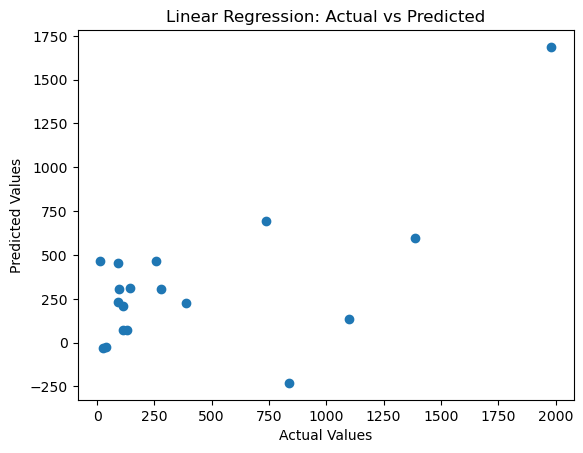

In [8]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred_linear_regression)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'preprocessed_data.csv' contains your dataset with features and target variable
parking_data = pd.read_csv("preprocessed_data.csv")
target_column = 'TOTALSPACECOUNT'
X = parking_data.drop(columns=[target_column, 'NAME', 'ADDRESS'])
y = parking_data[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Append the regression model to the pipeline
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the Linear Regression model
linear_regression_pipeline.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['categorical']['encoder'].get_feature_names_out(input_features=categorical_features)

# Combine numeric and categorical feature names
all_feature_names = np.concatenate([numeric_features, feature_names])

# Extract coefficients from the linear regression model
coefficients = linear_regression_pipeline.named_steps['regressor'].coef_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Display feature importance
print("Linear Regression Model Feature Importance:")
print(feature_importance_df)


Linear Regression Model Feature Importance:
                                              Feature  Coefficient
0                                          FACILITYID    -3.178357
1                                        EVSPACECOUNT   -98.659014
2                                       ADASPACECOUNT   194.880293
3                                  RESERVEDSPACECOUNT   -99.599854
4                                      NUMBEROFLEVELS     3.089709
5                          OWNERSHIP_City of San Jose  -406.697248
6                                   OWNERSHIP_Private  -247.627389
7   OWNERSHIP_Privately Owned Parking with Public ...  -169.959658
8                              OWNERSHIP_SJSU Parking   824.284294
9                                  PARKINGTYPE_Garage   203.805857
10                                    PARKINGTYPE_Lot  -203.805857
11                  LASTUPDATE_2021/06/23 00:08:34+00    -3.123264
12                  LASTUPDATE_2021/06/23 00:08:35+00  -226.777104
13                